# Introduction to NLP Fundamentals in TensorFlow

### Get helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2025-04-05 05:54:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-05 05:54:53 (45.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Visualize your data

In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2025-04-05 05:55:10--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2025-04-05 05:55:10 (50.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [7]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [10]:
# Total samples
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Visualize the data
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n {text}\n")
  print("----\n")



Target: 0 (not real disaster)
Text:
 Zone of the Enders MGS2 God of War. RT @D_PageXXI: Quote this with your favorite PS2 game

----

Target: 0 (not real disaster)
Text:
 Did you miss the #BitCoin explosion - Don't miss out - #Hangout tonight at 8:30PM EST ===&gt;&gt;&gt; http://t.co/qKaHXwLWXa

----

Target: 1 (real disaster)
Text:
 And so it begins.. day one of the snow apocalypse

----

Target: 1 (real disaster)
Text:
 Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM

----

Target: 1 (real disaster)
Text:
 @Hurricane_Dolce no prob

----



### Split data into training and validation sst

In [12]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels,  val_labels = train_test_split(train_df_shuffled["text"].to_numpy(), # Expects a numpy array
                                                                               train_df_shuffled["target"].to_numpy(),
                                                                               test_size=0.1,
                                                                               random_state=42)

## Converting text to numbers

 ## Text vectorization (tokenization)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [14]:
from string import whitespace
from os.path import split
# Use default parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?


In [15]:
# Find average num of tokens in training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [16]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length= max_length)

In [17]:
# Fit the data
text_vectorizer.adapt(train_sentences)

In [18]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
It's a heat wave. #Squad #RevItUp #PizzaRev http://t.co/bp8bm8xSXw      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  37,    3,  288,  472, 1470, 9109, 9750,    1,    0,    0,    0,
           0,    0,    0,    0]])>

In [20]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all unique words
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Bottom 5 least common words: [np.str_('pages'), np.str_('paeds'), np.str_('pads'), np.str_('padres'), np.str_('paddytomlinson1')]


### Creating an Embedding using an Embedding Layer
We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

* `input_dim` - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* `output_dim` - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
*`embeddings_initializer` - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.

In [21]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)
embedding

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [22]:
# Get a random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
I'M SCREAMING AND FANGIRLING OH MY GOD  https://t.co/WdVQlEWYBs      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.036755  , -0.03075728,  0.00196117, ..., -0.03703781,
          0.04279277,  0.01030198],
        [-0.01418723, -0.04443243,  0.02211126, ..., -0.00606032,
          0.00832003, -0.0280642 ],
        [-0.04452859, -0.01113528, -0.02096698, ..., -0.03372815,
         -0.01510466, -0.01709499],
        ...,
        [-0.026489  , -0.01795473, -0.00383765, ...,  0.04487672,
         -0.0495983 , -0.00084474],
        [-0.026489  , -0.01795473, -0.00383765, ...,  0.04487672,
         -0.0495983 , -0.00084474],
        [-0.026489  , -0.01795473, -0.00383765, ...,  0.04487672,
         -0.0495983 , -0.00084474]]], dtype=float32)>

In [23]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.036755  , -0.03075728,  0.00196117, -0.02744467, -0.04676851,
       -0.03373768,  0.00609845, -0.02503288, -0.00340984, -0.02977749,
        0.02269692,  0.01868509,  0.00959154, -0.03327463, -0.02005557,
        0.02643949,  0.00297487, -0.02411456,  0.00900823, -0.01888745,
        0.0266801 , -0.04525261, -0.02157891, -0.00455777, -0.00475524,
       -0.03012104, -0.0463274 , -0.02613007,  0.00459527,  0.00484096,
        0.00961566,  0.02144125,  0.03249319,  0.00720032,  0.02880033,
        0.0076038 , -0.0232816 , -0.04364736, -0.03167214,  0.0297381 ,
        0.04102216, -0.036316  ,  0.0382862 ,  0.02350331, -0.02038747,
       -0.03590006, -0.03341984,  0.00677126,  0.00896075, -0.0474134 ,
       -0.00732677, -0.01617551, -0.00434724,  0.04776312, -0.02194124,
        0.03998352,  0.02556321,  0.03733977,  0.04931397, -0.02972562,
       -0.04217307, -0.03926166,  0.01014832,  0.01337913, -0.01495717,
        0.001054

### Modelling a text dataset

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

### Model 0: Getting a baseline
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the Scikit-Learn machine learning map.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
# Evaluate a model
baseline_score = model_0.score(val_sentences, val_labels)

In [26]:
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [27]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)

In [28]:
# import sklearn
# report = sklearn.metrics.classification_report(baseline_preds, val_labels)

In [29]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [30]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [31]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [32]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1 dimensionsal
x = text_vectorizer(inputs)
x = embedding(x) # create an embedding of numberized inputs
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [33]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
            optimizer="Adam",
                metrics=["accuracy"])

In [36]:
# Fit the model
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")]
                        )

Saving TensorBoard log files to: model_logs/model_1_dense/20250405-055512
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6341 - loss: 0.6498 - val_accuracy: 0.7598 - val_loss: 0.5340
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8119 - loss: 0.4576 - val_accuracy: 0.7822 - val_loss: 0.4734
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8569 - loss: 0.3591 - val_accuracy: 0.7861 - val_loss: 0.4604
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8887 - loss: 0.2912 - val_accuracy: 0.7835 - val_loss: 0.4609
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9145 - loss: 0.2420 - val_accuracy: 0.7835 - val_loss: 0.4834


In [37]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(762, 1)

In [38]:
# Look at a single prediction
model_1_pred_probs[0]

array([0.33532405], dtype=float32)

In [39]:
# Convert probabilities to label formart
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [40]:
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [41]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7893369161898318,
 'recall': 0.7834645669291339,
 'f1': 0.780037033211351}

In [42]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [43]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing embedded layer

In [44]:
# Get the vocab from text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [45]:
# Get the weight matrix of embedding layer
# Numerical representations of each token in training data

embed_weights = model_1.get_layer("embedding").get_weights()
embed_weights

[array([[-0.028325  , -0.00202975,  0.01573448, ...,  0.05721952,
         -0.06266703, -0.01564055],
        [-0.03873154,  0.02335318,  0.04452484, ..., -0.03307837,
         -0.01435882,  0.00022549],
        [-0.0255358 ,  0.03385453,  0.02344658, ..., -0.0175344 ,
         -0.03262769, -0.00865821],
        ...,
        [-0.0059524 ,  0.00782143, -0.0109084 , ..., -0.04204583,
          0.00370364,  0.02712065],
        [-0.00998028,  0.02702373,  0.01896443, ...,  0.03135723,
         -0.08414633, -0.03944755],
        [-0.06799222,  0.11532072,  0.07558358, ...,  0.04635124,
         -0.11174213, -0.11026065]], dtype=float32)]

## Recurrent Neural Networks (RNN's)
The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

### Model 2: LSTM
LSTM: Long Short Term Memory
Structure looks like this:
```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

In [46]:
# Create an LSTM layer
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.LSTM(units=64, return_sequences=True)(x) # when you're stacking RNN cells together, you need to set return_sequence to True
x = layers.LSTM(64)(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [47]:
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [49]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20250405-055541
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8778 - loss: 0.3131 - val_accuracy: 0.7782 - val_loss: 0.5655
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9445 - loss: 0.1539 - val_accuracy: 0.7703 - val_loss: 0.6582
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9516 - loss: 0.1316 - val_accuracy: 0.7756 - val_loss: 0.7617
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9626 - loss: 0.1011 - val_accuracy: 0.7782 - val_loss: 0.8050
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9699 - loss: 0.0782 - val_accuracy: 0.7795 - val_loss: 0.8344


In [50]:
# Make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[1.28907254e-02],
       [5.60005903e-01],
       [9.99543130e-01],
       [7.15051517e-02],
       [5.47286356e-04],
       [9.94709373e-01],
       [9.19177055e-01],
       [9.99711990e-01],
       [9.99481499e-01],
       [3.23575258e-01],
       [2.16885307e-03],
       [9.21829343e-01],
       [6.78870303e-04],
       [2.06176564e-01],
       [2.37490094e-04],
       [8.55018757e-03],
       [2.19862675e-03],
       [1.40715321e-03],
       [4.20651734e-02],
       [9.97378767e-01],
       [9.88280237e-01],
       [8.70413380e-04],
       [9.64913309e-01],
       [8.70738551e-03],
       [9.99328017e-01],
       [9.99723494e-01],
       [2.27562487e-02],
       [1.59267744e-03],
       [1.14652037e-03],
       [3.16555798e-01],
       [9.35896575e-01],
       [2.83014122e-02],
       [4.79096137e-02],
       [1.01926308e-02],
       [4.91743803e-01],
       [9.18009952e-02],
       [9.99044836e-01],
       [1.59111187e-01],
       [4.50954959e-02],
       [9.99566853e-01],


In [51]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [52]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)

In [53]:
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7825962002002497,
 'recall': 0.7795275590551181,
 'f1': 0.7770045099502749}

### Model 3: GRU (Gated Recurrent Unit)
The GRU cell has similar features to an LSTM cell but has less parameters.

In [54]:
# Build an RNN model using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences=True)(x) # stacking recurrent cells requires return_sequences=True
# x = layers.LSTM(64, return_sequences=True)(x)
# x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="mode_3_GRU")

In [55]:
model_3.summary()


Model: "mode_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model_3.compile("Adam", "binary_crossentropy", metrics=["accuracy"])

In [57]:
# Fit the model
model_3.fit
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20250405-055619
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8674 - loss: 0.2829 - val_accuracy: 0.7822 - val_loss: 0.7331
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9658 - loss: 0.0946 - val_accuracy: 0.7717 - val_loss: 0.8843
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9763 - loss: 0.0723 - val_accuracy: 0.7743 - val_loss: 1.0414
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9757 - loss: 0.0605 - val_accuracy: 0.7769 - val_loss: 1.0414
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.9788 - loss: 0.0491 - val_accuracy: 0.7769 - val_loss: 1.0914


In [58]:
model_3_pred_probs = model_3.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [59]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [60]:
# Calculate results
model_3_results = calculate_results(val_labels, model_3_preds)

In [61]:
model_3_results

{'accuracy': 77.69028871391076,
 'precision': 0.7769803060533722,
 'recall': 0.7769028871391076,
 'f1': 0.7758759837011532}

In [62]:
### Model 4: Bidirectonal RNN model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [63]:
# Get summary
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

Notice the increased number of trainable parameters in model_4 (bidirectional LSTM) compared to model_2 (regular LSTM). This is due to the bidirectionality we added to our RNN.

In [64]:
# Compile
model_4.compile("Adam", "binary_crossentropy", metrics=["accuracy"])

In [65]:
history_4 =  model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20250405-055718
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9504 - loss: 0.1966 - val_accuracy: 0.7717 - val_loss: 0.8973
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9811 - loss: 0.0488 - val_accuracy: 0.7703 - val_loss: 1.1847
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9827 - loss: 0.0397 - val_accuracy: 0.7677 - val_loss: 1.2124
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9796 - loss: 0.0424 - val_accuracy: 0.7690 - val_loss: 1.4638
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9831 - loss: 0.0416 - val_accuracy: 0.7743 - val_loss: 1.4294


In [66]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[2.6201113e-04],
       [6.8696648e-01],
       [9.9996191e-01],
       [3.6054647e-01],
       [4.1633004e-05],
       [9.9978733e-01],
       [9.3964046e-01],
       [9.9998659e-01],
       [9.9997491e-01],
       [9.9708253e-01]], dtype=float32)

In [67]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [68]:
model_4_results = calculate_results(val_labels, model_4_preds)

In [69]:
model_4_results

{'accuracy': 77.42782152230971,
 'precision': 0.7771676205309502,
 'recall': 0.7742782152230971,
 'f1': 0.7716950935205196}

## Convolutional Neural Networks for Text
A typical CNN architecture for sequences will look like the following:

```Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)```

### Model 5: Conv1D

In [70]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="valid") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [71]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.00231066, -0.01488824,  0.0147105 , ...,  0.01210478,
          -0.02375784,  0.00433418],
         [-0.00046657,  0.00780695,  0.03114939, ...,  0.03722699,
           0.0068056 ,  0.03409547],
         [-0.00216569, -0.01325122, -0.03813803, ...,  0.05665301,
           0.00605823,  0.03582865],
         ...,
         [-0.02084146, -0.04685441, -0.02236924, ...,  0.00375271,
          -0.02768984, -0.02108959],
         [-0.02084146, -0.04685441, -0.02236924, ...,  0.00375271,
          -0.02768984, -0.02108959],
         [-0.02084146, -0.04685441, -0.02236924, ...,  0.00375271,
          -0.02768984, -0.02108959]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.06923391, 0.        , 0.03240398, 0.        ,
          0.01308177, 0.        , 0.        , 0.00189705, 0.        ,
          0.        , 0.00548129, 0.        , 0.        , 0.        ,
          0.        , 0.

In [72]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(64, 5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1")

In [73]:
# Compile Conv1D model
model_5.compile("Adam", "binary_crossentropy", metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,089 (5.04 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20250405-055808
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9512 - loss: 0.1697 - val_accuracy: 0.7703 - val_loss: 0.8982
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9759 - loss: 0.0678 - val_accuracy: 0.7703 - val_loss: 1.0135
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9795 - loss: 0.0553 - val_accuracy: 0.7546 - val_loss: 1.0899
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9789 - loss: 0.0509 - val_accuracy: 0.7572 - val_loss: 1.1454
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9795 - loss: 0.0472 - val_accuracy: 0.7507 - val_loss: 1.2286


In [75]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[4.0493827e-02],
       [9.6731454e-01],
       [9.9996525e-01],
       [7.2263844e-02],
       [9.9400029e-07],
       [9.9924195e-01],
       [9.9297678e-01],
       [9.9999225e-01],
       [9.9999958e-01],
       [9.0956312e-01]], dtype=float32)

In [76]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [77]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.06561679790026,
 'precision': 0.7502819757880341,
 'recall': 0.7506561679790026,
 'f1': 0.7497154845080984}

## Using Pretrained Embeddings (transfer learning for NLP)

### Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [78]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [79]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE"
                                        )

In [80]:
# Create model using the Functional API instead of Sequential
import tensorflow as tf
from tensorflow.keras import layers

# Define input layer
inputs = tf.keras.Input(shape=[], dtype=tf.string)

# Wrap the TensorFlow Hub layer in a Lambda layer
# This converts the KerasTensor to a TensorFlow Tensor
x = layers.Lambda(lambda x: sentence_encoder_layer(tf.cast(x, tf.string)))(inputs)

# Continue with the rest of the model
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_6 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20250405-055904
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7675 - loss: 0.5689 - val_accuracy: 0.8058 - val_loss: 0.4522
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8099 - loss: 0.4248 - val_accuracy: 0.8084 - val_loss: 0.4435
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8216 - loss: 0.4014 - val_accuracy: 0.8123 - val_loss: 0.4369
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8286 - loss: 0.3912 - val_accuracy: 0.8097 - val_loss: 0.4344
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8233 - loss: 0.3950 - val_accuracy: 0.8150 - val_loss: 0.4297


In [82]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[0.17195795],
       [0.79702544],
       [0.9825389 ],
       [0.18954106],
       [0.7798678 ],
       [0.78237724],
       [0.98057425],
       [0.97905123],
       [0.9368605 ],
       [0.0964964 ]], dtype=float32)

In [83]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [84]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8157643862730394,
 'recall': 0.8149606299212598,
 'f1': 0.8139865765354786}

### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [86]:
from sklearn.model_selection import train_test_split

train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [90]:
# Build model 7
# model_7 = tf.keras.models.clone_model(model_6)
# Create model using the Functional API instead of Sequential
import tensorflow as tf
from tensorflow.keras import layers

# Define input layer
inputs = tf.keras.Input(shape=[], dtype=tf.string)

# Wrap the TensorFlow Hub layer in a Lambda layer
# This converts the KerasTensor to a TensorFlow Tensor
x = layers.Lambda(lambda x: sentence_encoder_layer(tf.cast(x, tf.string)))(inputs)

# Continue with the rest of the model
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_7 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_7_USE")

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20250405-061341
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5980 - loss: 0.6832 - val_accuracy: 0.7218 - val_loss: 0.6490
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8107 - loss: 0.6105 - val_accuracy: 0.7533 - val_loss: 0.5882
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8126 - loss: 0.5333 - val_accuracy: 0.7677 - val_loss: 0.5322
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8331 - loss: 0.4501 - val_accuracy: 0.7795 - val_loss: 0.4994
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8490 - loss: 0.4101 - val_accuracy: 0.7808 - val_loss: 0.4894


In [92]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [94]:
model_7_results = calculate_results(val_labels, model_7_preds)

### Comparing the performance of each of our models

In [95]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.346457,0.789337,0.783465,0.780037
lstm,77.952756,0.782596,0.779528,0.777005
gru,77.690289,0.776980,0.776903,0.775876
bidirectional,77.427822,0.777168,0.774278,0.771695
conv1d,75.065617,0.750282,0.750656,0.749715
tf_hub_sentence_encoder,81.496063,0.815764,0.814961,0.813987
tf_hub_10_percent_data,78.083990,0.788610,0.780840,0.776707


In [96]:

# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

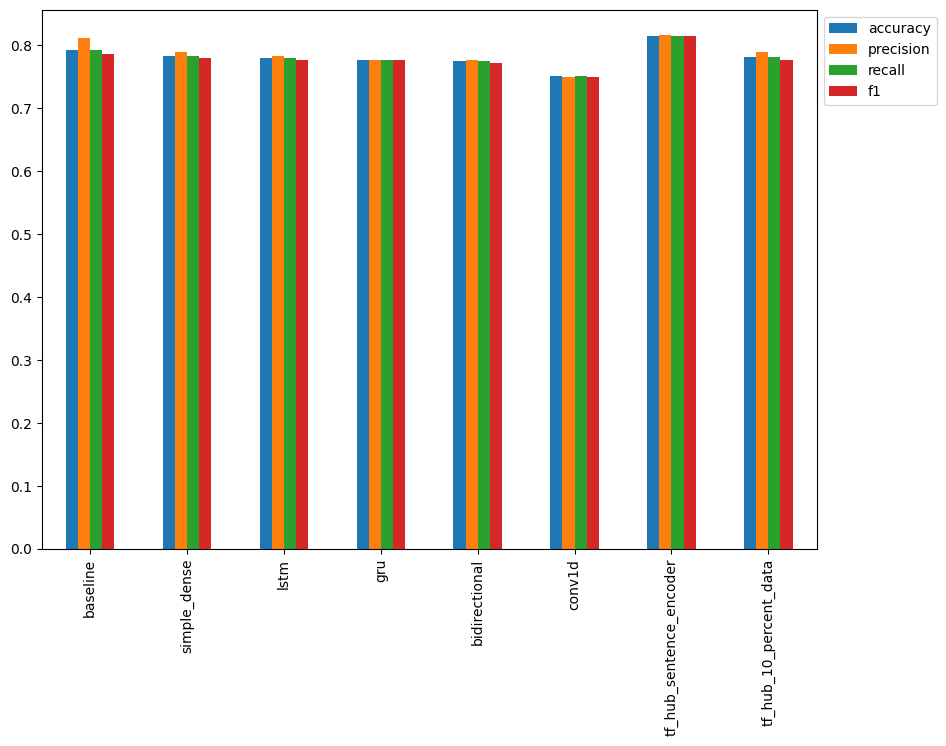

In [97]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

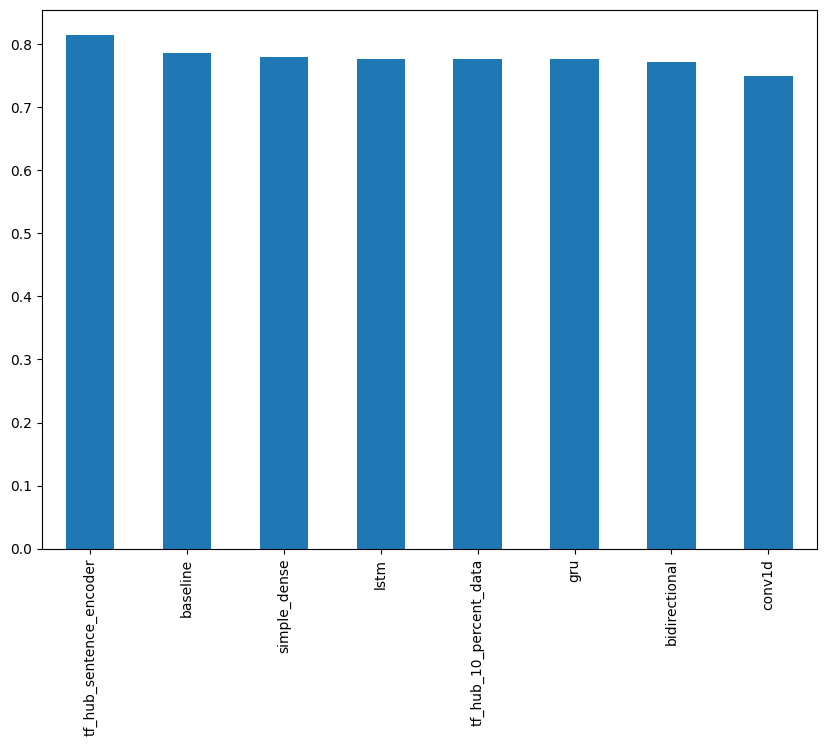

In [98]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Finding the most wrong examples

In [100]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.171958
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.797025
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.982539
3,@camilacabello97 Internally and externally scr...,1,0.0,0.189541
4,Radiation emergency #preparedness starts with ...,1,1.0,0.779868


In [101]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.924560
759,FedEx will no longer transport bioterror patho...,0,1.0,0.886769
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.868282
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.849191
628,@noah_anyname That's where the concentration c...,0,1.0,0.846409
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.836255
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.829406
695,A look at state actions a year after Ferguson'...,0,1.0,0.812751
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.805596
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.797741


In [102]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9245596528053284
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8867694139480591
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8682824373245239
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8491911292076111
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8464086651802063
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8362547159194946
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pr

In [103]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06552683562040329
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.0627092570066452
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.058139901608228683
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.057941120117902756
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.04610808193683624
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.04526384919881821
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03639734908938408
Text:
Reddit Will Now Qua

In [116]:
import numpy as np
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  # model_6 expects a string, not a tokenized sequence
  # Pass the raw string directly to model_6.predict, but in the correct format
  # Convert the string to a NumPy array and reshape it, and specify dtype as object
  pred_prob = tf.squeeze(model_6.predict(np.array([test_sample], dtype=object)))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Pred: 0, Prob: 0.40435636043548584
Text:
#3: Car Recorder ZeroEdgeå¨ Dual-lens Car Camera Vehicle Traffic/Driving History/Accident Camcorder  Large Re... http://t.co/kKFaSJv6Cj

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Pred: 1, Prob: 0.7925238013267517
Text:
@womanxking Well you're safe in NY. Avoid inundation zones in the pacific north west though.

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Pred: 1, Prob: 0.6454517841339111
Text:
Uganda Seen as a Front Line in the Bioterrorism Fight

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Pred: 0, Prob: 0.049271609634160995
Text:
I think that's been the best bit of this match. Kurt Zouma absolutely flattened that bloke.

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Pred: 1, Prob: 0.983801543712616
Text:
Israeli police unable to solve the case of Duma arson attack http://t.co/WtZgXzaf7Z

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Pred: 1, Prob: 0.6734235882759094
Text:
U.S National Park Services Tonto Nat

In [117]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [118]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


(0.6842137140001796, 0.0008979182598427554)

In [119]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.01722443899961945, 2.260425065566857e-05)

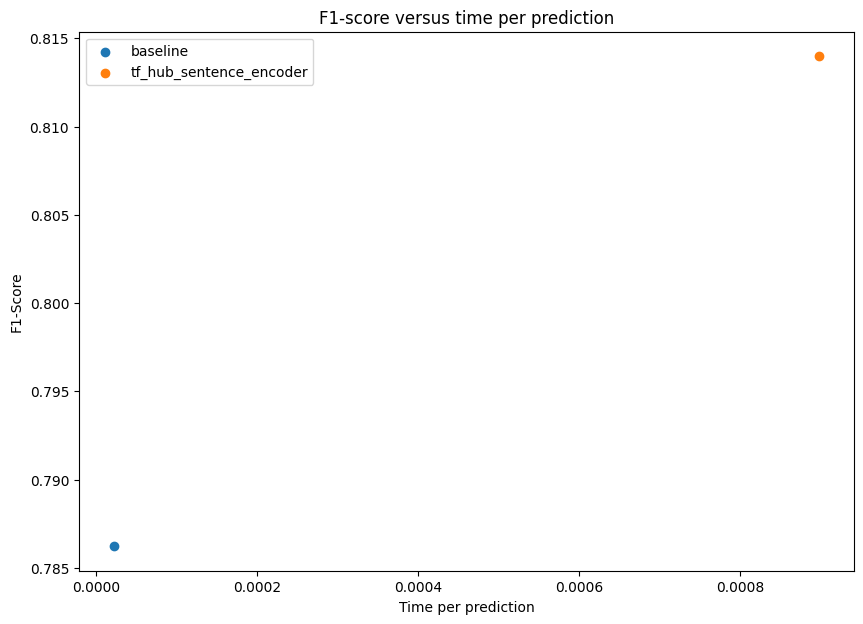

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");